# Appendix
In this page we can find further development of concepts used in previous chapters.

(appendix:violinplot)=
## 1. Violin Plots

Violin plots are a powerful tool that puts together the information from *Box plots* and *KDE Plots*.

### 1.1. Example

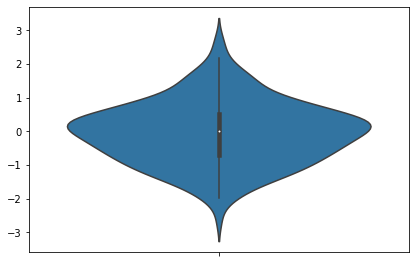

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

np.random.seed(42)
x = np.random.normal(loc=0.0, scale=1.0, size=200)

fig, ax = plt.subplots(1, 1)
plt.tight_layout()

sns.violinplot(y=x, ax=ax, whis=1.5)

plt.show()

As we already said, a Violin plot is the combination of box plots and kde plots. Let's have a look at them first.

### 1.2. Building Blocks

#### 1.2.1. Box Plots

Box plots are used to depict numerical data through their quartiles.

##### 1.2.1.1. example

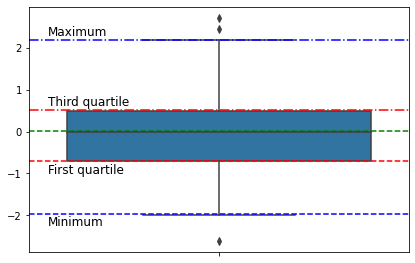

In [2]:
np.random.seed(42)
x = np.random.normal(loc=0.0, scale=1.0, size=200)

fig, ax = plt.subplots(1, 1)
plt.tight_layout()

sns.boxplot(y=x, ax=ax, whis=1.5)

# Median and quartiles
med = sorted(x)[len(x)//2]
fq = sorted(x)[len(x)//4]
tq = sorted(x)[len(x)//4*3]

# Inter-quaritles range
iqr = tq - fq

# Minimum and maximum
mmin = sorted(x)[int(np.floor(tq + iqr*1.5))]
mmax = sorted(x)[int(np.floor(fq - iqr*1.5))]

# Lines with text
ax.axhline(fq, ls='--', color='r', label='First quartile')
ax.text(-0.45, fq - 0.3, "First quartile", fontsize=12)
ax.axhline(tq, ls='-.', color='r', label='Third quartile')
ax.text(-0.45, tq + 0.1, "Third quartile", fontsize=12)

ax.axhline(med, ls='--', color='g', label='Median')

ax.axhline(mmin, ls='--', color='b', label='Minimum')
ax.text(-0.45, mmin - 0.3, "Minimum", fontsize=12)
ax.axhline(mmax, ls='-.', color='b', label='Maximum')
ax.text(-0.45, mmax + 0.1, "Maximum", fontsize=12)

plt.show()

##### 1.2.1.2. Building blocks

The main concept behind this representation is the *Percentile*:

*A percentile is a score below which falls a given percentage of the data*

$
  P_n = \frac{n}{100}N
$

where:
* $n$ is the desired percentile
* $N$ is the total number of observation


The components needed to build this kind of plot are:

1. **First Quartile ($P_{25}$)**: *Median* of the *lower half* of the dataset.
2. **Second Quartile ($P_{75}$)**: *Median* of the *upper half* of the dataset.
3. **Inter-Quartile Range ($P_{75}$ - $P_{25}$)**: Distance *between* the *thrid* and the *first* quartile
4. **Minimum ($P_{25} - 1.5\, \text{IQR}$)**: 1.5 times the *IQR below the first* quartile
5. **Maximum ($P_{75} + 1.5\, \text{IQR}$)**: 1.5 times the *IQR above the thrid* quartile
6. **Outliers**: Any point falling *above the maximum* and *below the minimum*

##### 1.2.1.3. Usage and Interpretation

The best feature of box plots is that they sum the data distribution with only 5 values (First/Second/Thrid Quartile, Maximum and Minimum). They give a clear, although rough understanding of the distribution of our data.

#### 1.2.2. KDE Plots

Kernel Density Estimation Plots represent an **estimated probability density function** based on a finite data sample.

##### 1.2.2.1. Example

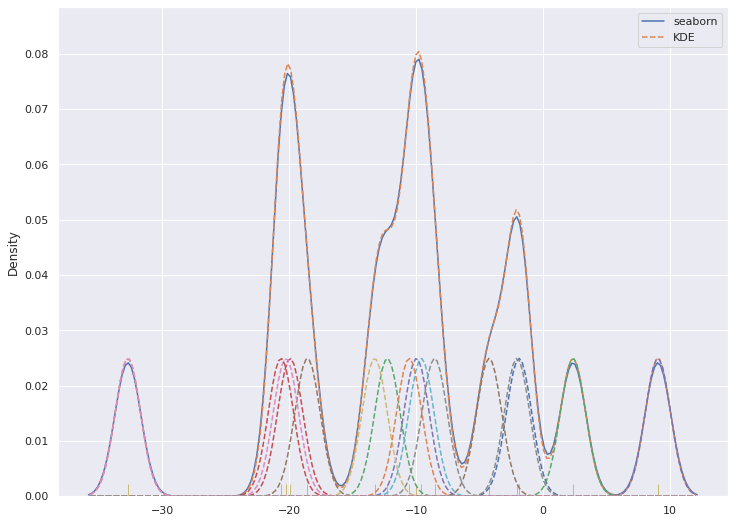

In [3]:
from scipy.stats import norm
import scipy as sp

sns.set_theme()

# generate sample data
np.random.seed(42)

data = []
underlying_distrib = np.random.normal(-10, 7, 300)
data.extend(np.random.choice(underlying_distrib[:150], 8))
data.extend(np.random.choice(underlying_distrib[-150:], 8))

samples = 200

# bandwidth parameter (standard deviation of each kernel)
bandwidth=1

# grid points
xmin = min(data) - 3 * bandwidth
xmax = max(data) + 3 * bandwidth
x = np.linspace(xmin, xmax, samples)

# compute KDE by hand
kde = np.zeros(samples)

kdes = []
for val in data:
    kdes.append(norm.pdf(x, loc=val, scale=bandwidth))
kde = np.sum(kdes, axis=0)

# normalize
norm_fact = sp.integrate.simps(kde, x)
kde /= norm_fact


# plot computed kde

# in scipy, the bandwidth is scaled by the standard deviation.
# In order to be able to compare our implementation with scipy's, we must
# divide the bandwidth by the standard deviation of the sample.
bandwidth=1/np.std(data)

plt.figure(figsize=(12, 9))
ax = sns.kdeplot(data, label="seaborn", bw_method=bandwidth)
sns.lineplot(x=x, y=kde, label="KDE", ax=ax)

# plot single kernels
for kd in kdes:
    # https://gsalvatovallverdu.gitlab.io/python/kernel_density_estimation/
    sns.lineplot(x=x, y=kd/norm_fact, ax=ax, palette="Paired")

for line in ax.lines[1:]:
    line.set_linestyle("--")

# plot sample data
sns.rugplot(data, ax=ax, palette="Paired")

plt.legend();
plt.show()

##### 1.2.2.2. Building blocks

Kernel Density Estimate is a procedure used to estimate a density function, starting from a sample, originated from an unknown underlying distribution.
In order to build such estimated density function, we must chose an appropriate **kernel**.
We can choose among many different kernels, in our explanation we will use the normal kernel.
The following equation shows how we build the KDE:

$$ {\displaystyle {\widehat {f}}_{h}(x)={\frac {1}{m}}\sum _{i=1}^{n}K{\Big (}{\frac {x-x_{i}}{h}}{\Big )},} $$

Where:
* $K$ is the Gaussian kernel centered in a given point $x_i$
* $h$ is the *bandwidth* of the kernel (the standard deviation). This parameter influences the smoothness of the estimated function.
* $m$ is a scaling factor. Seaborn's implementation of KDE uses the integral of the sum of the kernels as the scaling factor.

From an intuitive point of view, we are centering a Gaussian distribution in each of our sample points, and calling the sum of such distributions our KDE.

##### 1.2.2.3. Usage and Interpretation
KDE plots give a powerful representation of what we expect to be the underlying distribution of our sample data.
It is a non-parametric method, meaning that we do not need strong assumptions on the unknown distribution, but it is very sensible on the choice of bandwidth, and the amount of data.

### 1.3. Usage and Interpretation
The Violin plot puts together the information of the Box and the KDE, making it more even more powerful information-wise.
The side effect is that it requires a deeper understanding in order to read it correctly, and so it can be intimidating, making it less common.

All these plots are commonly used to show differences among populations.


(appendix:chi-squared)=
## 2. Pearson's $\chi^2$ test for Statistical Independence
The chi-squared test is a statistical *hypothesis test* carried out when the *test statistic* is chi-squared distributed under the *null hypothesis*.
The way we use Pearson's chi-squared test to test for statistical independence is the following:

Suppose to have data from 1000 athletes concerning the brand of their shoes, and the final place. Both features are categorical, and suppose they are encoded ordinally.

In [4]:
import pandas as pd

df_fake = pd.DataFrame(columns=["shoes", "podium"])

np.random.seed(42)
samples = 1000

# There are 3 brands of shoes
shoes = [1, 2, 3]
# There are 4 possible final positions: 1st, 2nd, 3rd and 0 for not-on-the-podium
podium = [1, 2, 3, 0]

# Let's insert some dependence between brand of shoes and final place
podium_rigged_good = [1, 2, 3, 0] * 3 + [1]
podium_rigged_bad = [1, 2, 3, 0] * 3 + [0]

for i in range(samples):
    shoe = np.random.choice(shoes)
    # brand 1 will be better than all the other
    if shoe == 1:
        pos = np.random.choice(podium_rigged_good)
    # brand 2 will be worse
    elif shoe == 2:
        pos = np.random.choice(podium_rigged_bad)
    # and brand 3 will give equal chance to all positions
    else:
        pos = np.random.choice(podium)

    df_fake = df_fake.append({'shoes': shoe, 'podium': pos}, ignore_index=True)

df_fake

,shoes,podium
0,3,0
1,1,3
2,1,1
3,3,2
4,3,3
...,...,...
995,3,0
996,1,3
997,2,3
998,1,1


Our *observation* is made up of two values (one for *shoes* and one for *podium*), and we want our *$H_0$* to say that **the two random variables are statistically independent**.
To carry on the test we must compute the *contingency table*, counting each occurrence for each pair of values.

In [5]:
data_crosstab = pd.crosstab(df_fake['shoes'], df_fake['podium'])
data_crosstab

podium,0,1,2,3
shoes,,,,
1,89,124,71,75
2,98,69,70,89
3,74,75,78,88


In a standard chi-squared test, we would need to formulate our *null hypothesis* by choosing some values for the desired occurrences of each variables, and this would give us theoretical values for the expected values of our observation. The resulting test statistic would assume the form:

$${\displaystyle \chi ^{2}=\sum _{i=1}^{n}{\frac {(O_{i}-E_{i})^{2}}{E_{i}}}=N\sum _{i=1}^{n}{\frac {\left((O_{i}/N)-p_{i}\right)^{2}}{p_{i}}}}$$

Since in this case, our $H_0$ is that the two variables are independent, we define our expected values as

$$E_{{i,j}}=Np_{{i\cdot }}p_{{\cdot j}}$$

Where:

* ${\displaystyle p_{{i\cdot }}={\frac {O_{{i\cdot }}}{N}}=\sum _{{j=1}}^{c}{\frac {O_{{i,j}}}{N}}}$ is the fraction of observations ignoring the column attribute
* ${\displaystyle p_{{\cdot j}}={\frac {O_{{\cdot j}}}{N}}=\sum _{{i=1}}^{r}{\frac {O_{{i,j}}}{N}}}$ is the fraction of observations ignoring the row attribute

Now we

In [6]:
from scipy.stats import chi2_contingency

chi_stat, p, dof, expected = chi2_contingency(data_crosstab)

print(f"chi-squared statistic:\t{chi_stat:.4f}")
print(f"p-value:\t\t{p:.4f}")

chi-squared statistic:	22.0507
p-value:		0.0012


After this step we can finally compute the statistic as follows:

$$\chi ^{2}=\sum _{{i=1}}^{{r}}\sum _{{j=1}}^{{c}}{(O_{{i,j}}-E_{{i,j}})^{2} \over E_{{i,j}}}=N\sum _{{i,j}}p_{{i\cdot }}p_{{\cdot j}}\left({\frac  {(O_{{i,j}}/N)-p_{{i\cdot }}p_{{\cdot j}}}{p_{{i\cdot }}p_{{\cdot j}}}}\right)^{2}$$

We then choose a significance of 0.95 for our test ($\alpha = 0.5$), and draw the distribution with the significance level and the statistics value

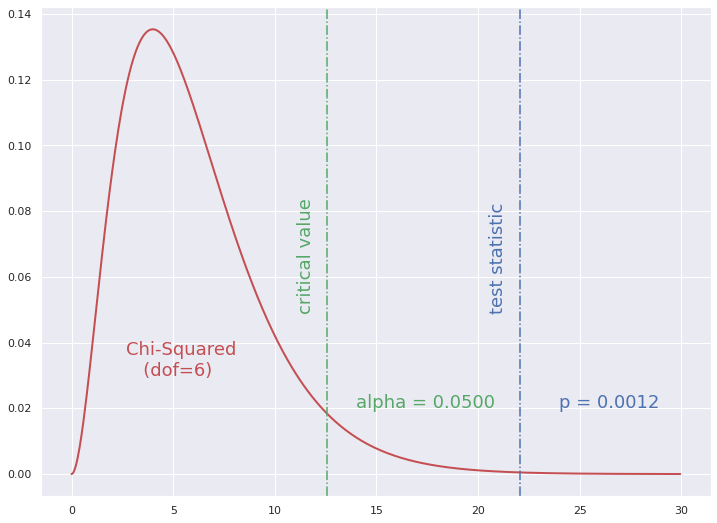

In [7]:
from scipy.stats import chi2
plt.figure(figsize=(12, 9))

# Choose the significance level and find the critical value
prob = 0.95
critical = chi2.ppf(prob, dof)

# Build X axis
x = np.arange(0, 30, .05)

# Draw the chi-squared pdf witht he appropriate dof
ax = sns.lineplot(x=x, y=chi2.pdf(x, df=np.prod(data_crosstab.shape) - np.sum(data_crosstab.shape) + 1), color='r', lw=2)
ax.text(2.7, 0.03, f'Chi-Squared\n   (dof={dof})', fontsize=18, color='r')

# Draw the test statistics
ax.axvline(chi_stat, ls='-.', color='b', label='test-statistic')
ax.text(chi_stat-1.5, 0.05, "test statistic", fontsize=18, rotation='vertical', color='b')
ax.text(24, 0.02, f"p = {p:.4f}", fontsize=18, color='b')

# Draw the line leaving behind 95% of the area under the curve
ax.axvline(critical, ls='-.', color='g', label='critical-value')
ax.text(critical-1.5, 0.05, "critical value", fontsize=18, rotation='vertical', color='g')
ax.text(14, 0.02, f"alpha = {1-prob:.4f}", fontsize=18, color='g')

plt.show()

Since our p-value is smaller than the $\alpha$ we decided, we end up rejecting the $H_0$, hence, the two random variables are **NOT** independent.